In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import pandas as pd
import pathlib

%load_ext autoreload
%autoreload 2

In [2]:
BASE_PATH = pathlib.Path(
    "/Users/giovanni.palla/dataset_raw_icb/20201214_SquidpyData_giovanni.palla"
)
DATA_PATH = "seqFISH"

In [3]:
adata = sc.read(BASE_PATH / DATA_PATH / "mouse_gastro.h5ad")

In [4]:
adata.obsm["X_umap"] = adata.obs[["UMAP1", "UMAP2"]].to_numpy()
adata.obsm["spatial"] = adata.obs[["x_global_affine", "y_global_affine"]].to_numpy()
# adata.uns["spatial"] = {}

In [5]:
adata = adata[adata.obs.embryo=="embryo1"].copy()

/Users/giovanni.palla/miniconda3/envs/spatial/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [6]:
sel = adata.obs["celltype_mapped_refined"].value_counts()[adata.obs["celltype_mapped_refined"].value_counts() > 50].index.values
adata = adata[adata.obs["celltype_mapped_refined"].isin(sel)].copy()

/Users/giovanni.palla/miniconda3/envs/spatial/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [7]:
adata.obs = adata.obs.drop(columns=['UMAP1', 'UMAP2','uniqueID', 'embryo', 'pos', 'z', 'x_global_affine', 'y_global_affine', 'embryo_pos', 'embryo_pos_z',])

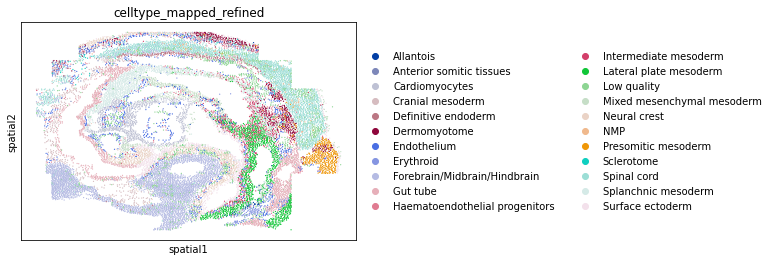

In [8]:
sc.pl.embedding(adata, color="celltype_mapped_refined", basis="spatial")

In [9]:
adata.raw = adata

In [10]:
adata.write("/Users/giovanni.palla/Datasets/tutorial_data/seqfish.h5ad")